# Gráficos de Radiales y de Torta

## Importar librerías requeridas

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# Gráfico Radial
## Cargar dataset
El dataset corresponde a cuantas toneladas de paltas fueron cosechadas en cada mes durante el 2019.

**Importante:** el dataset fue creado solo con fines educativos y para dar una semántica a los datos. No es información verdadera.

In [17]:
df = pd.read_csv("dataset/cosechas-gt.csv")
df.head()

,mes,cosecha
0,Enero,3
1,Febrero,1
2,Marzo,1
3,Abril,6
4,Mayo,8


### Calcular ángulo para cada barra
Para un gráfico radial, es necesario definir en qué posición, estará cada dato, dado que la disposición es circular, la posición se debe indicar como angulos que estén entre 0 y 2xPI (0 y 6,28).

Para lograr esto, es necesario generar una lista con los ángulos de cada dato en donde nos se asegure que cada dato tiene la misma separación y están entre 0 y 2xPI. A continuación se explica cada línea.

Este proceso se deberá hacer siempre que se quiera hacer un gráfico radial y se utilice **matplotlib** para visualizar.

In [14]:
# Crear variable con el valor de pi
PI = 3.14

# Crear variable con la cantidad de datos a visualizar
N = len(df)

# Crear variable que tendrá el valor del andulo de cada dato
angulo_actual = 0

# Crear lista que guardará cada valor
angulos = []

# Loop que finaliza solo cuando angulo_actual sea mayor a 2*PI
while angulo_actual < PI*2:
    # Guardar el valor que tiene angulo_actual
    angulos.append(angulo_actual)
    
    # Aumentar el valor de angulo_actual en PI*2/N
    angulo_actual = angulo_actual + (PI*2)/N
    
# Imprimir la lista de angulos
angulos

[0,
 0.5233333333333333,
 1.0466666666666666,
 1.5699999999999998,
 2.0933333333333333,
 2.6166666666666667,
 3.14,
 3.6633333333333336,
 4.1866666666666665,
 4.71,
 5.233333333333333,
 5.756666666666667]

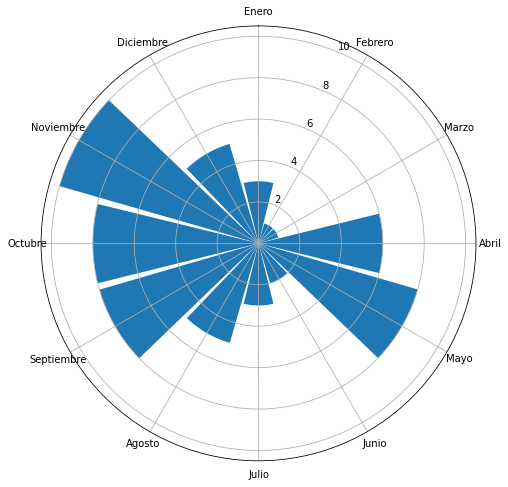

In [22]:
# Se crea una figura en matplotlib para poner el gráfico de tamaño 8x8 pulgadas
fig = plt.figure(figsize=(8, 8))

# A la figura se le agrega un gráfico con dispocisión circular (plot=Tru e)
plot = fig.add_subplot(polar=True)

# Se crea el gráfico. Para esto se entregan 3 argumentos
# * Primero se le entrega la lista de angulos para saber donde posicion ar cada dato
# *
# * #

# n #
# 2*PI/N, se está asignando todo el espacio de la circunferencia a ca da dato
# y por lo tanto, no habrá separación entre cada dato. Se sugiere pro bar el
# cambia el (N+1) por otro valor como `N`, `N+2`, `2*N` para que vean el efecto
# de cambiar el ancho máximo.
plot.bar(angulos, df["cosecha"], width=2*PI/(N+1))

### Cambiar confuguración
# Indicar desde donde partir el primer dato, con PI/2 significa partir d esde arriba
plot.set_theta_offset(PI/2)

# Indicar la dirección hacia donde empezar a poner los datos, con -1 sig nifica la derecha
plot.set_theta_direction(-1)

# Indicar la posición de cada etiqueta radial
plot.xaxis.set_ticks(angulos)

# Indicar el texto de cada etiqueta radial.
plot.set_xticklabels(df["mes"])

# Visualizar el gráfico
plt.show()

## Gráfico de torta
### Cargar dataset

El dataset corresponde a los ingredientes y cantidad en gramos requerida para hacer un pie de berries

**Importante:** el dataset fue creado solo con fines educativos y para dar una semántica a los datos. No es información verdadera.

In [25]:
df2 = pd.read_csv("dataset/pie-gt.csv")

df2.head(5)

,ingredientes,gramos
0,Harina,375
1,Azucar,75
2,Mantequilla,250
3,Berries,300


### Generar Visualización

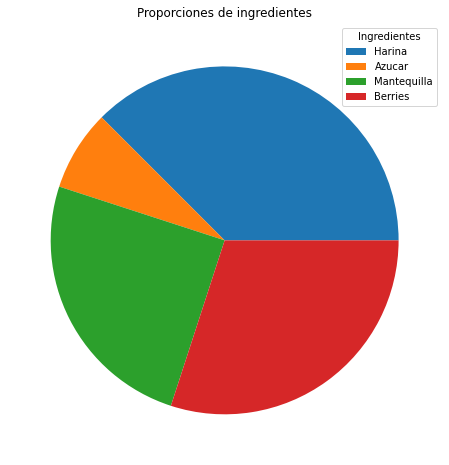

In [27]:
# Se crea una figura en matplotlib para poner el gráfico de tamaño 8x8 pulgadas
fig = plt.figure(figsize=(8, 8))

# A la figura se le agrega un gráfico
plot = fig.add_subplot()

# Se crea un gráfico de torta con el método pie y se le entrega la lista de valores.
# En este caso el método retorna una lista con los diferentes objetos pr esentes en la visualización
# El primero es una lista de cada segmento circular, en este caso, son 4 segmentos (1 por ingrediente)
pie_plot = plot.pie(df2["gramos"])

# Se agrega la leyenda en donde se le entrega la listra de cada segmento circular
# una lista de strings que será el nombre asignado a cada elemento
# y opcionalmente hacer title="Ingredientes" para darle un título a la leyenda
plot.legend(pie_plot[0], df2["ingredientes"], title="Ingredientes")

#Se asigna un título al gráfico
plot.set_title("Proporciones de ingredientes")

# Visualizar el gráfico
plt.show()